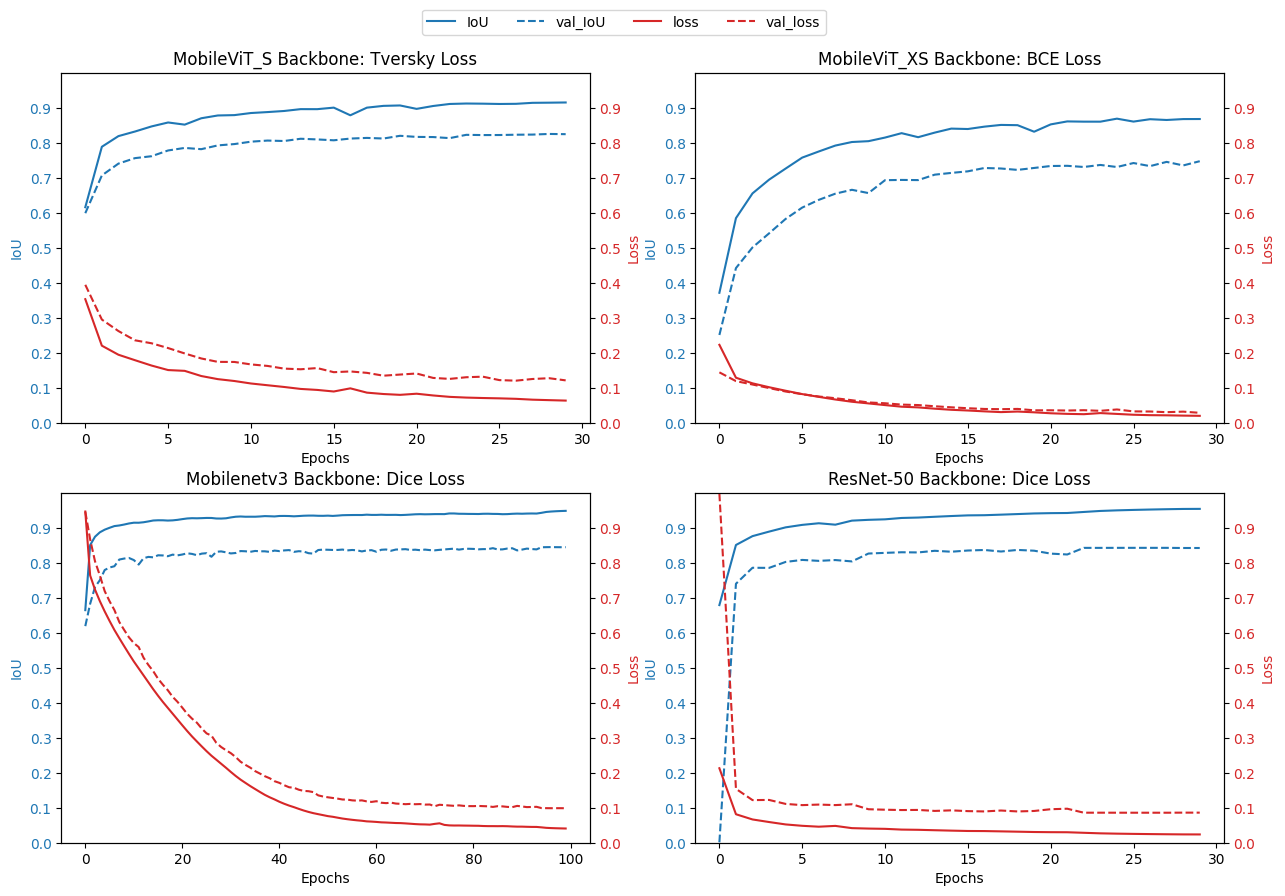

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the names of your .csv files
csv_files = ['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv']

# Define the titles for your subplots
titles = ['MobileViT_S Backbone: Tversky Loss', 'MobileViT_XS Backbone: BCE Loss', 'Mobilenetv3 Backbone: Dice Loss', 'ResNet-50 Backbone: Dice Loss']

# Create a new figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

lines, labels = [], []

for i, ax in enumerate(axs.flatten()):
    # Read the csv file
    df = pd.read_csv(csv_files[i])

    # Set title for the subplot
    ax.set_title(titles[i])

    # Plot IoU and val_IoU
    color = 'tab:blue'
    ax.set_xlabel('Epochs')
    ax.set_ylabel('IoU', color=color)
    line1, = ax.plot(df['epoch'], df['iou'], color=color)
    line2, = ax.plot(df['epoch'], df['val_iou'], color=color, linestyle='dashed')
    ax.tick_params(axis='y', labelcolor=color)
    ax.set_ylim([0.0, 1.0])  # Set limits for first y-axis
    ax.set_yticks(np.arange(0.0, 1.0, 0.1))  # Set ticks for first y-axis

    # Create a second y-axis to plot loss and val_loss
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Loss', color=color)
    line3, = ax2.plot(df['epoch'], df['loss'], color=color)
    line4, = ax2.plot(df['epoch'], df['val_loss'], color=color, linestyle='dashed')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([0.0, 1.0])  # Set limits for second y-axis
    ax2.set_yticks(np.arange(0.0, 1.0, 0.1))  # Set ticks for second y-axis

    # Ask matplotlib for the plotted objects and their labels
    if i == 0:  # Only add the labels and lines during the first iteration
        lines += [line1, line2, line3, line4]
        labels += ['IoU', 'val_IoU', 'loss', 'val_loss']

# Create a single legend for the whole figure
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4)

# Save the figure before showing it
plt.savefig('Combined dataset plot.png', dpi=300, bbox_inches='tight')

plt.show()
